In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-implicit-stiff)

The following simple ODE uncovers a surprise.

In [2]:
f = lambda t, u: u**2 - u**3
u0 = array([0.005])
tspan = [0, 400]

We will solve the problem first with the implicit AM2 method using $n=200$ steps.

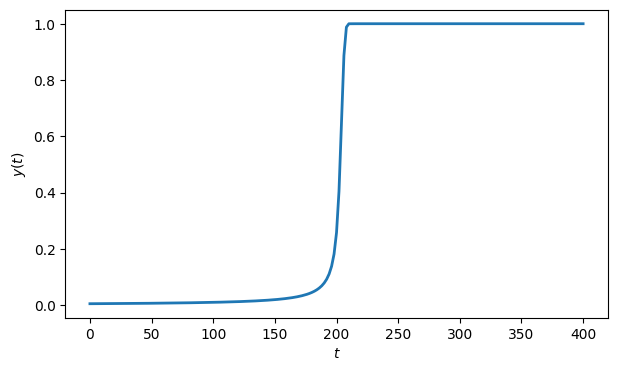

In [3]:
tI, uI = FNC.am2(f, [0.0, 400.0], u0, 200)
fig, ax = subplots()
ax.plot(tI, uI[0], label="AM2")
xlabel("$t$"), ylabel("$y(t)$");

So far, so good. Now we repeat the process using the explicit AB4 method.

/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_25826/862619530.py:1: RuntimeWarning: overflow encountered in square
  f = lambda t, u: u**2 - u**3
/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_25826/862619530.py:1: RuntimeWarning: overflow encountered in power
  f = lambda t, u: u**2 - u**3
/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_25826/862619530.py:1: RuntimeWarning: invalid value encountered in subtract
  f = lambda t, u: u**2 - u**3


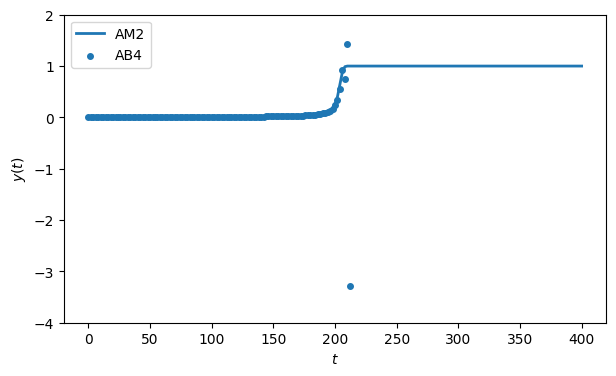

In [4]:
tE, uE = FNC.ab4(f, [0.0, 400.0], u0, 200)
ax.scatter(tE, uE[0], label="AB4")
ax.set_ylim([-4, 2]), ax.legend()
fig

Once the solution starts to take off, the AB4 result goes catastrophically wrong.

In [5]:
uE[0, 104:111]

array([ 7.55385780e-01,  1.43729703e+00, -3.28897685e+00,  2.14179113e+02,
       -4.48208915e+07,  4.12689029e+23, -3.22144124e+71])

We hope that AB4 will converge in the limit $h\to 0$, so let's try using more steps.

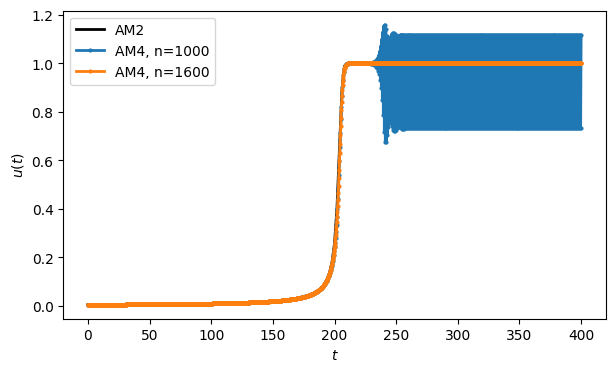

In [6]:
plot(tI, uI[0], color="k", label="AM2")
tE, uE = FNC.ab4(f, [0, 400], u0, 1000)
plot(tE, uE[0], ".-", label="AM4, n=1000")
tE, uE = FNC.ab4(f, [0, 400], u0, 1600)
plot(tE, uE[0], ".-", label="AM4, n=1600")
xlabel("$t$"),  ylabel("$u(t)$")
legend();

So AB4, which is supposed to be _more_ accurate than AM2, actually needs something like 8 times as many steps to get a reasonable-looking answer!